In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

seed = 7

data = pd.read_csv('data/sepsis_final.csv').drop(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID'], axis=1)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

X = data.drop(['28 Day Death', 'In Hospital Death'], axis=1)
y = data['28 Day Death']

for column in X.columns:
    X[column] = pd.to_numeric(X[column])
    X[column] = X[column].fillna(X[column].mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=220, max_depth=7, random_state=seed).fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Average Precision: " + str(average_precision))

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: " + str(accuracy))

ROC AUC: 0.8732000942430203
Average Precision: 0.8290912492953482
Accuracy: 0.7944403803950256


In [31]:
import importlib
import medical_explainer
importlib.reload(medical_explainer)


<module 'medical_explainer' from '/home/llja/repos/Uni_ACS/medical_explainer.py'>

In [32]:
explainer = medical_explainer.explainer(
    clf, X_train, y_train, X_test, y_test)
# explainer.plot_calibration_original()
# explainer.calibrate()
# explainer.plot_calibration_calibrated()


| Step 1  ==> Calibrating model


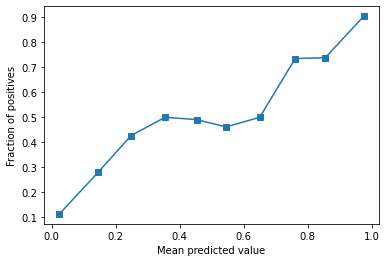

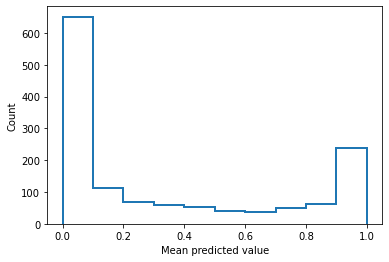

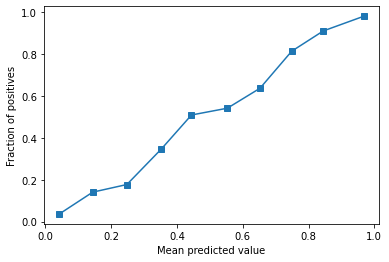

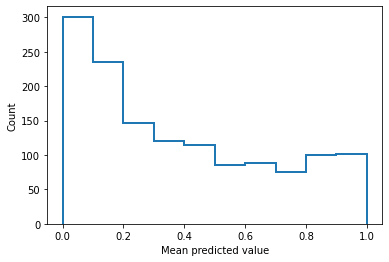

ROC AUC: 0.8732000942430203
Average Precision: 0.8290912492953482
Accuracy: 0.7944403803950256
ROC AUC: 0.8833255552635632
Average Precision: 0.8439502452533523
Accuracy: 0.8054133138258961

| Step 2 ==> Calculate SHAP values

| Step 3 ==> Fit clinical score calculator
Novel fitting


Probability threshold: 0.1
Score threshold: 16.0

Probability threshold: 0.5
Score threshold: 28.0

Probability threshold: 0.9
Score threshold: 40.0



In [33]:
explainer = medical_explainer.explainer(
    clf, X_train, y_train, X_test, y_test)

explainer.fit(10, shap_method='tree', method='novel')

In [34]:
explainer.score_array_list

[array([ 8., -5.]),
 array([-3.,  3.]),
 array([-2.,  4.]),
 array([-2.,  4.]),
 array([-3.,  2.]),
 array([ 4., -1.,  3.]),
 array([-2.,  1.]),
 array([-1.,  1.]),
 array([ 1., -1.,  5.]),
 array([ 1., -1.])]

In [35]:
explainer.breakpoints_list

[[-0.3222222222222222, 8.528525005249879, 294.66041666666666],
 [11.6, 15.454703310833976, 30.5],
 [0.008, 5.3236031612305705, 153.928],
 [18.258726899383984, 75.30841200699106, 90.0],
 [0.0, 0.9258831707918498, 3.0],
 [0.0, 379.5115312418199, 1068.6834113554087, 1773.0],
 [38.0, 296.37334896450943, 23111.0],
 [0.2, 3.4274520784910347, 17.3],
 [0.0, 0.4991708174959605, 1.1176575436934981, 5.0],
 [0.0, 2.749989406824065, 5.2]]

In [36]:
explainer.scoring_table

,Score,Probability
0,0.0,0.004919
1,1.0,0.005918
2,2.0,0.007120
3,3.0,0.008563
4,4.0,0.010296
5,5.0,0.012375
6,6.0,0.014867
7,7.0,0.017852
8,8.0,0.021424
9,9.0,0.025692


In [37]:
scores,probs,predictions = explainer.predict_calculator(X_test, 1)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

# accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

# print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))

ROC AUC: 0.7535839533134577
Average Precision: 0.6611741988750871
Accuracy: 0.717629846378932
[[766  78]
 [308 215]]
